# Detecting Credit Card Fraud

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Data Exploration and pre-processing

In [259]:
data = pd.read_csv("creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


##### range seems to be between -3,3. Time column seems to range between 0 and infinity. We can check the count of the column "class" which is evidently our target variable to see if it matches up with the data stated on kaggle

##### the only non transformed features are "Time" and "Amount". "Time" is the seconds elapsed between each transaction and the first transaction in the dataset. "Amount" refers to the amount the transaction took place for

In [313]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [264]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

data types matchup with csv read into pandas

In [76]:
data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

class 0 refers to the cases that are "not fraud" while class 1 refers to the cases that are "fraud". We have a very imbalanced dataset which means we should use measure the accuracy using the AOC precision-recall curve somewhere in our analysis

array([[<Axes: title={'center': 'Time'}>, <Axes: title={'center': 'V1'}>,
        <Axes: title={'center': 'V2'}>, <Axes: title={'center': 'V3'}>,
        <Axes: title={'center': 'V4'}>, <Axes: title={'center': 'V5'}>],
       [<Axes: title={'center': 'V6'}>, <Axes: title={'center': 'V7'}>,
        <Axes: title={'center': 'V8'}>, <Axes: title={'center': 'V9'}>,
        <Axes: title={'center': 'V10'}>, <Axes: title={'center': 'V11'}>],
       [<Axes: title={'center': 'V12'}>, <Axes: title={'center': 'V13'}>,
        <Axes: title={'center': 'V14'}>, <Axes: title={'center': 'V15'}>,
        <Axes: title={'center': 'V16'}>, <Axes: title={'center': 'V17'}>],
       [<Axes: title={'center': 'V18'}>, <Axes: title={'center': 'V19'}>,
        <Axes: title={'center': 'V20'}>, <Axes: title={'center': 'V21'}>,
        <Axes: title={'center': 'V22'}>, <Axes: title={'center': 'V23'}>],
       [<Axes: title={'center': 'V24'}>, <Axes: title={'center': 'V25'}>,
        <Axes: title={'center': 'V26'}>, <

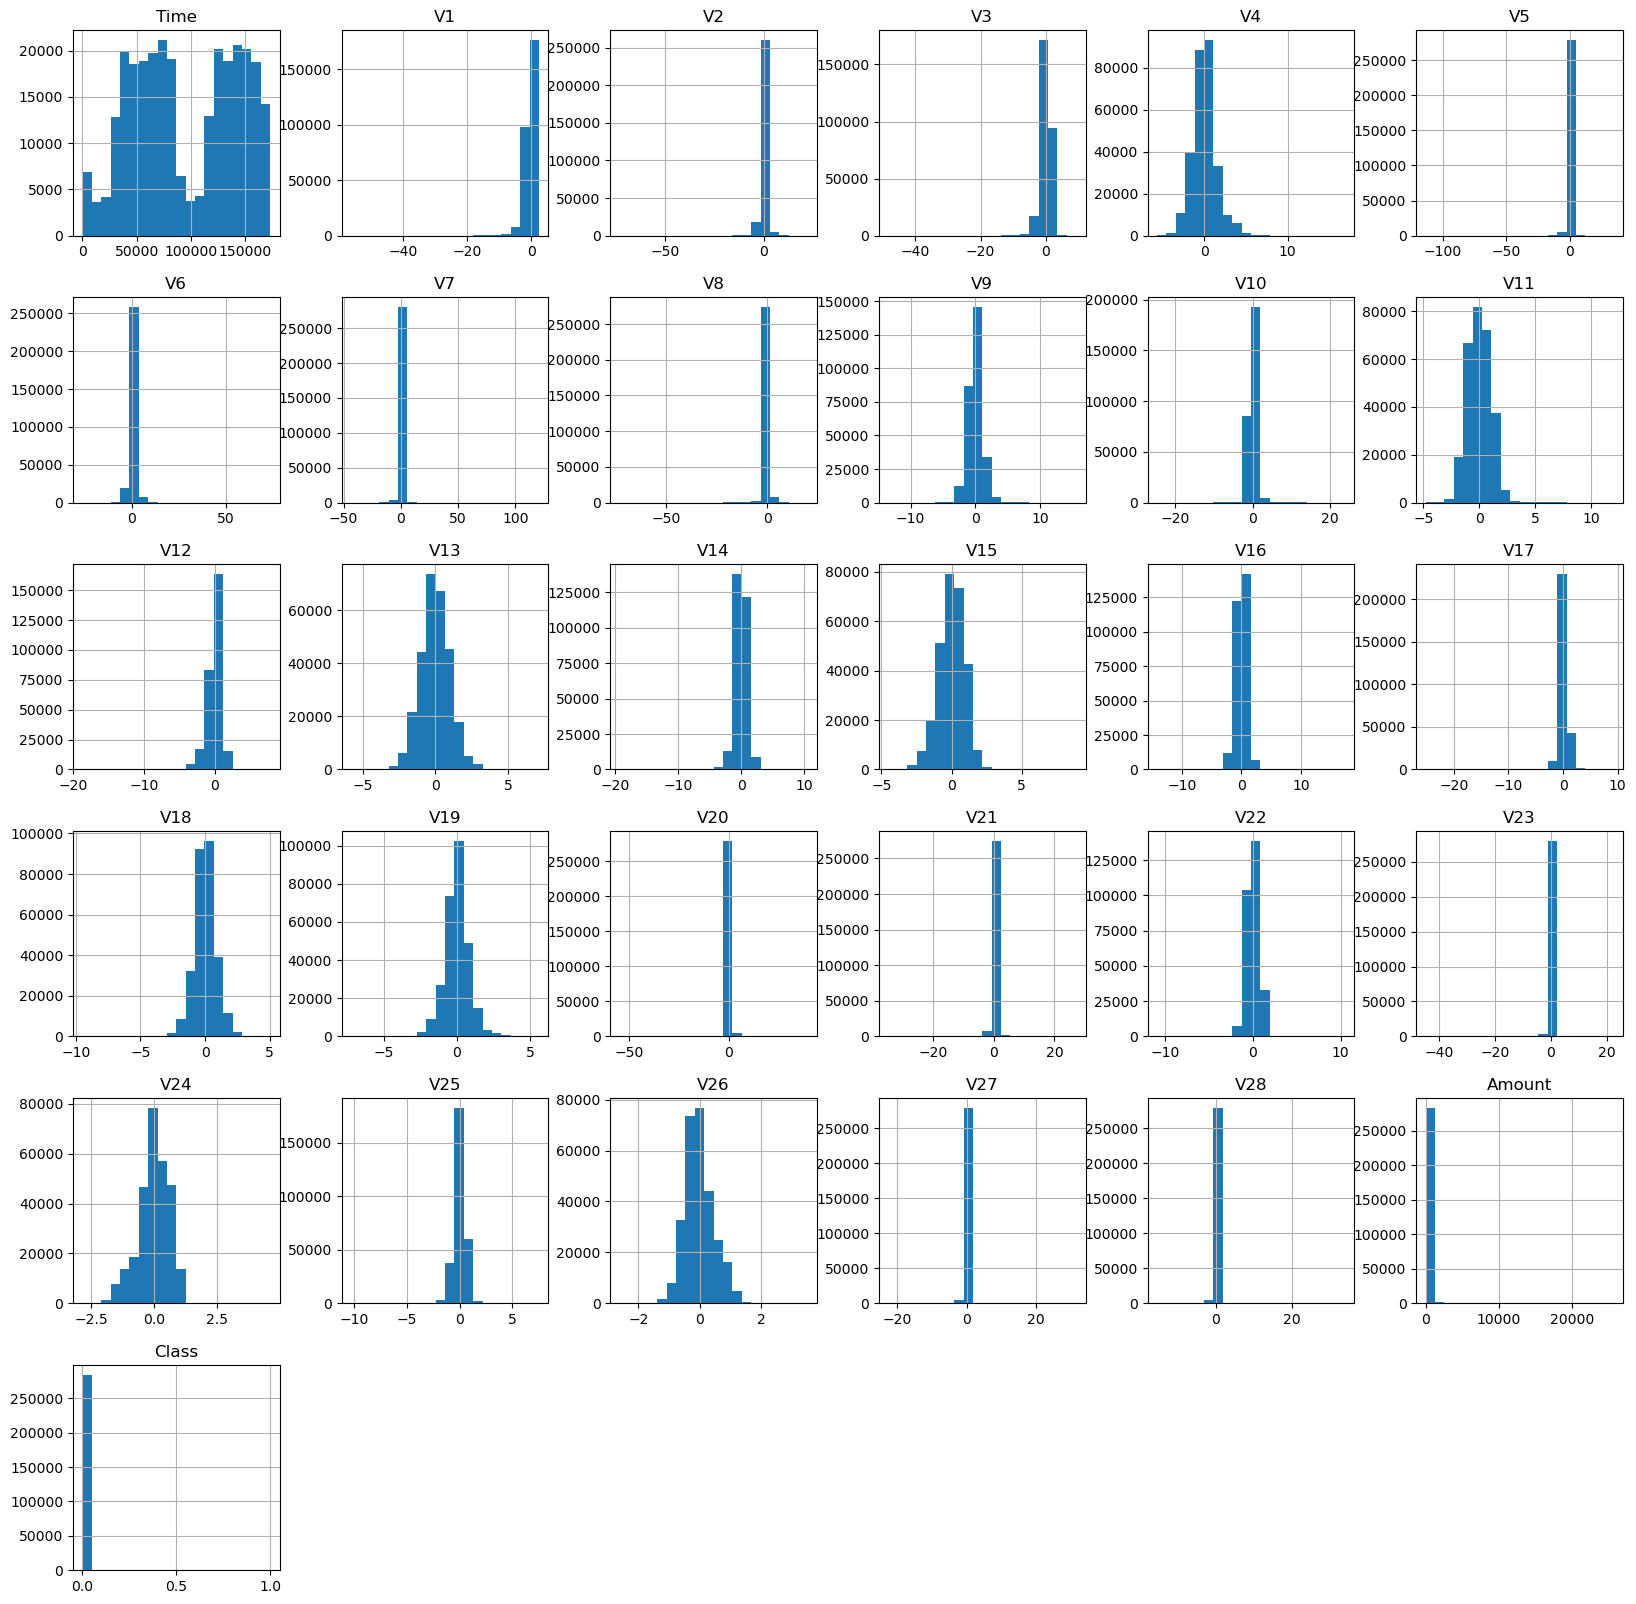

In [57]:
data.hist(bins = 20, figsize = (20,20))

In [73]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


##### Note that the range for feature variables such as amount is very large, from 0 to 25691, therefore we must perform preprocessing. Lets create a boxplot to see if we have large outliers in this dataset

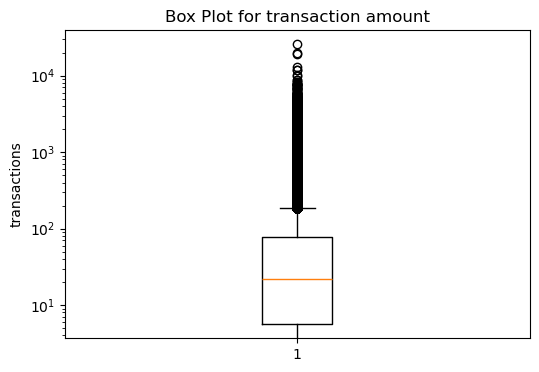

In [90]:
plt.figure(figsize=(6, 4)) 
plt.boxplot(data['Amount'])
plt.title('Box Plot for transaction amount')
plt.ylabel('transactions')
plt.yscale('log')
plt.show()

Clearly alot of outliers, might be best to use robust scaler since its sensitive to the precense of outliers

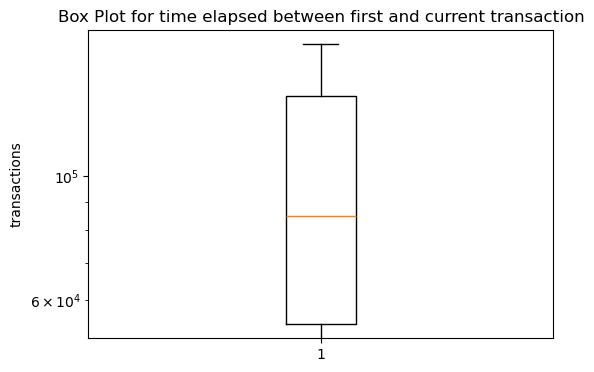

In [247]:
plt.figure(figsize=(6, 4)) 
plt.boxplot(data['Time'])
plt.title('Box Plot for time elapsed between first and current transaction')
plt.ylabel('transactions')
plt.yscale('log')
plt.show()

there are no outliers visible in the boxplot therefore we dont need to use RobustScaler. Instead we can use StandardScaler or MinMaxScaler

In [117]:
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler

In [119]:
new_data = data.copy()
new_data['Amount'] = RobustScaler().fit_transform(new_data['Amount'].to_numpy().reshape(-1,1)) #transforming it into a numpy array such that it is two dimeinsional, hence the -1,1
new_data['Time'] = MinMaxScaler().fit_transform(new_data['Time'].to_numpy().reshape(-1,1))
new_data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000000,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,1.783274,0
1,0.000000,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.269825,0
2,0.000006,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.983721,0
3,0.000006,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.418291,0
4,0.000012,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.670579,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,0.999965,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.296653,0
284803,0.999971,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0.038986,0
284804,0.999977,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0.641096,0
284805,0.999977,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.167680,0


new_data['Amount'].describe()

<Axes: >

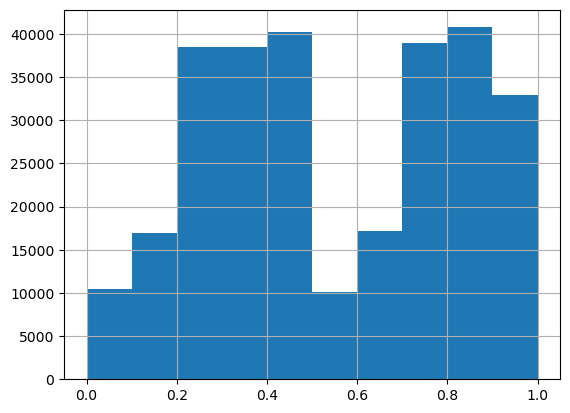

In [121]:
new_data['Time'].hist()

## Modeling
### Imbalanced dataset
#### Splitting dataset

In [133]:
from sklearn.model_selection import train_test_split

In [172]:
X = new_data.drop(columns = ['Class']).to_numpy()
y = new_data['Class'].to_numpy()

In [199]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42) #split into train and test
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, random_state = 42) #split training into train and validation

In [207]:
X_train.shape

(160203, 30)

In [203]:
y_train.shape

(160203,)

#### Logistic Regression
##### a) Whole dataset

In [307]:
from sklearn.linear_model import LogisticRegression

In [378]:
reg_model = LogisticRegression()
reg_model.fit(X_train,y_train)
reg_model.score(X_train,y_train)

0.9992571924370954

In [333]:
from sklearn.metrics import classification_report,confusion_matrix, ConfusionMatrixDisplay

In [339]:
print(classification_report(y_val, reg_model.predict(X_val), target_names = ['Not Fraud','Fraud']))

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     53306
       Fraud       0.88      0.61      0.72        96

    accuracy                           1.00     53402
   macro avg       0.94      0.81      0.86     53402
weighted avg       1.00      1.00      1.00     53402



#### Interpretation of the classification report

The precision and recall for the "not fraud", or class 0, is 1, indicating perfect predictions. There were no false positives or false negatives. The transactions we predicted as negative were true. However, we can see there is some room for improvement in predicting "fraud", or class 1. Precision measures of the positive predictions, how many were true positives. According to this 88% of our predictions were true positives which means 12% of the transactions were deemed to be false positives. This means 12% of customers who conducted transactions were wrongly flagged as fraudulent. The costs of this are naturally subjective and depend on each customer. The recall metric tells us of the total actual positive labels, how many were we able to identify. So of the actual fraud cases, we were able to identify 61% of them i.e. we missed 39% of fraud cases. The costs for this are again subjective but can be interpreted as being higher

It is important to note that the our dataset is heavily imbalanced with class 0 "not fraud" dominating which better explains why our precision and recall is so high. Since our model is seeing the majority class much more often, it becomes biased in its predictions

While our accuracy is determined to be 1 in this classification report, this is evidently wrong as we have clearly misclassified some transactions. We can see that our true accuracy is around 99.9% which still leaves room for improvement as clearly we have missed some fraudulent transactions. The imbalanced dataset also drastically impacts this high figure

In [381]:
conf_matrix = confusion_matrix(y_val, reg_model.predict(X_val))

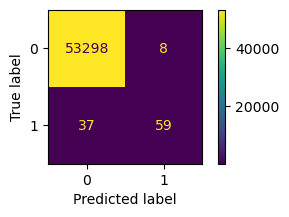

In [383]:
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=['0', '1'])
fig, ax = plt.subplots(figsize=(4, 2)) 
disp.plot(cmap='viridis', ax=ax)

#### LinearSVC

In [404]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
linear_model = LinearSVC(class_weight = "balanced") 
linear_model.fit(X_train,y_train)
linear_model.score(X_train,y_train)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.999250950356735

We set the class_weight to "balanced" since our dataset is highly imbalanced with the number of "not fraud" transactions far exceeding the "Fraud" transactions. What this does is assigns a higher weight to the "fraud" transactions so that the model does not bias its predictions. It is a way to balance the dataset without actually altering the dataset as would happen in undersampling techniques etc.

In [406]:
print(classification_report(y_val, linear_model.predict(X_val), target_names = ['Not Fraud','Fraud']))

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     53306
       Fraud       0.80      0.83      0.82        96

    accuracy                           1.00     53402
   macro avg       0.90      0.92      0.91     53402
weighted avg       1.00      1.00      1.00     53402



our classification has improved. Scores in precision for class 1 "fraud" are higher than those observed in logistic regression. What is interesting to see is that our precision score improves if class_weight is not set to "balanced". This is because, when we set our class_weight, we assign a higher penalty to missclassifying the minority class, which in this case is "Fraud". As a result, we bias the model towards the minority class, encouraging it to predict more "Fraud". As a result of this, precision falls but recall increases.

In the context of detecting credit card fraud, it is more important to have a high recall than it is to have a high precision as we want to ensure we do not miss any fraudulent transactions or miss any samples belonging to the Positive class. The costs of missing a true positive are higher than the costs of predicting a false positive

In [415]:
svc_matrix = confusion_matrix(y_val, linear_model.predict(X_val))

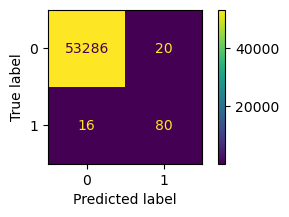

In [417]:
disp = ConfusionMatrixDisplay(svc_matrix, display_labels=['0', '1'])
fig, ax = plt.subplots(figsize=(4, 2)) 
disp.plot(cmap='viridis', ax=ax)

In [400]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth = 3, n_jobs = -1)
rf.fit(X_train,y_train)
rf.score(X_train,y_train)

0.9992447082763743

In [402]:
print(classification_report(y_val, rf.predict(X_val), target_names = ['Not Fraud','Fraud']))

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     53306
       Fraud       0.89      0.61      0.73        96

    accuracy                           1.00     53402
   macro avg       0.95      0.81      0.86     53402
weighted avg       1.00      1.00      1.00     53402



In [428]:
print(rf.score(X_train,y_train))
print(linear_model.score(X_train,y_train))
print(reg_model.score(X_train,y_train))

0.9992447082763743
0.999250950356735
0.9992571924370954


there arent major differences in scores between the three models but per the classification report we can see that the support vector machine model returns the best result

### Balanced dataset

Lets now change our highly imbalanced dataset by undersampling the majority class

In [438]:
new_data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

we want to make it so that there are 492 not frauds and 492 frauds. so lets undersample

In [441]:
fraud = new_data[new_data['Class'] ==1]
not_fraud = new_data[new_data['Class'] ==0]
not_fraud_undersampled = not_fraud.sample(n=len(fraud),random_state = 42)
balanced_new_data = pd.concat([not_fraud_undersampled,fraud])
balanced_new_data = balanced_new_data.sample(frac = 1,random_state = 42).reset_index(drop = True)
balanced_new_data['Class'].value_counts()

Class
1    492
0    492
Name: count, dtype: int64

In [443]:
balanced_new_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.238628,-10.645800,5.918307,-11.671043,8.807369,-7.975501,-3.586806,-13.616797,6.428169,-7.368451,...,2.571970,0.206809,-1.667801,0.558419,-0.027898,0.354254,0.273329,-0.152908,-0.307413,1
1,0.007570,-1.379848,0.536720,2.647870,1.408111,0.126442,0.986525,0.960251,-0.629717,1.729173,...,-0.666874,-0.343574,0.022138,0.093532,0.011293,-0.503395,-0.438189,-0.346731,0.304618,0
2,0.418578,-4.198735,0.194121,-3.917586,3.920748,-1.875486,-2.118933,-3.614445,1.687884,-2.189871,...,0.801312,-0.183001,-0.440387,0.292539,-0.144967,-0.251744,1.249414,-0.131525,3.030811,1
3,0.455374,-0.671155,1.183971,0.793623,-0.218410,0.357282,-0.023707,0.363563,0.463983,-0.704518,...,-0.083474,-0.352537,-0.092199,-0.764804,-0.292712,0.185362,-0.028254,0.055953,-0.289248,0
4,0.180819,1.087002,0.065459,0.485043,1.343874,-0.283361,0.002520,-0.076665,0.165384,0.151865,...,-0.040723,0.016005,-0.048042,0.208209,0.571482,-0.340377,0.028643,0.007649,-0.048068,0


In [493]:
X_b = balanced_new_data.drop(columns = ['Class']).to_numpy()
y_b = balanced_new_data['Class'].to_numpy()

X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_b,y_b, random_state = 42) #split into train and test
X_train_b, X_val_b, y_train_b, y_val_b = train_test_split(X_train_b,y_train_b, random_state = 42) #split training into train and validation

#### a) Logistic Regression

In [551]:
reg_model_b = LogisticRegression()
reg_model_b.fit(X_train_b,y_train_b)
reg_model_b.score(X_train_b,y_train_b)

0.9620253164556962

In [498]:
print(classification_report(y_val_b, reg_model_b.predict(X_val_b), target_names = ['Not Fraud','Fraud']))

              precision    recall  f1-score   support

   Not Fraud       0.92      0.99      0.95        94
       Fraud       0.99      0.91      0.95        91

    accuracy                           0.95       185
   macro avg       0.95      0.95      0.95       185
weighted avg       0.95      0.95      0.95       185



#### b) Linear SVC

In [501]:
linear_model_b = LinearSVC()
linear_model_b.fit(X_train_b,y_train_b)
linear_model_b.score(X_train_b,y_train_b)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.9656419529837251

In [503]:
print(classification_report(y_val_b, linear_model_b.predict(X_val_b), target_names = ['Not Fraud','Fraud']))

              precision    recall  f1-score   support

   Not Fraud       0.91      1.00      0.95        94
       Fraud       1.00      0.90      0.95        91

    accuracy                           0.95       185
   macro avg       0.96      0.95      0.95       185
weighted avg       0.96      0.95      0.95       185



Interesting to see the precision score here for "fraud". Not once did we flag a transaction as fraud that then turned out to be "not fraud". This naturally has its benefits since we didnt bother a customer about this. But see that our Recall is 0.90 indicating we did still miss some of the fraudulent transactions. Therefore we still have that tradeoff

#### c) Random Forest

In [507]:
rf_b = RandomForestClassifier(max_depth = 3, n_jobs = -1)
rf_b.fit(X_train_b,y_train_b)
rf_b.score(X_train_b,y_train_b)

0.9475587703435805

In [509]:
print(classification_report(y_val_b, rf_b.predict(X_val_b), target_names = ['Not Fraud','Fraud']))

              precision    recall  f1-score   support

   Not Fraud       0.91      0.98      0.94        94
       Fraud       0.98      0.90      0.94        91

    accuracy                           0.94       185
   macro avg       0.94      0.94      0.94       185
weighted avg       0.94      0.94      0.94       185



### Oversampling

In [520]:
fraud = new_data[new_data['Class'] ==1]
not_fraud = new_data[new_data['Class'] ==0]
fraud_oversampled = fraud.sample(n=len(not_fraud), replace = True, random_state = 42)
balanced_new_data_1 = pd.concat([fraud_oversampled,not_fraud])
balanced_new_data_1 = balanced_new_data_1.sample(frac = 1,random_state = 42).reset_index(drop = True)
balanced_new_data_1['Class'].value_counts()

Class
0    284315
1    284315
Name: count, dtype: int64

In [522]:
X_b1 = balanced_new_data_1.drop(columns = ['Class']).to_numpy()
y_b1 = balanced_new_data_1['Class'].to_numpy()

X_train_b1, X_test_b1, y_train_b1, y_test_b1 = train_test_split(X_b1,y_b1, random_state = 42) #split into train and test
X_train_b1, X_val_b1, y_train_b1, y_val_b1 = train_test_split(X_train_b1,y_train_b1, random_state = 42) #split training into train and validation

#### a) Logistic Regression

In [534]:
reg_model_b1 = LogisticRegression()
reg_model_b1.fit(X_train_b1,y_train_b1)
print(classification_report(y_val_b1, reg_model_b1.predict(X_val_b1), target_names = ['Not Fraud','Fraud']))

              precision    recall  f1-score   support

   Not Fraud       0.93      0.98      0.95     53459
       Fraud       0.98      0.92      0.95     53159

    accuracy                           0.95    106618
   macro avg       0.95      0.95      0.95    106618
weighted avg       0.95      0.95      0.95    106618



#### b) LinearSVC

In [530]:
linear_model_b1 = LinearSVC()
linear_model_b1.fit(X_train_b1,y_train_b1)
print(classification_report(y_val_b1, linear_model_b1.predict(X_val_b1), target_names = ['Not Fraud','Fraud']))

/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


              precision    recall  f1-score   support

   Not Fraud       0.92      0.98      0.95     53459
       Fraud       0.98      0.92      0.95     53159

    accuracy                           0.95    106618
   macro avg       0.95      0.95      0.95    106618
weighted avg       0.95      0.95      0.95    106618



/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


#### c) Random Forest

In [540]:
rf_b1 = RandomForestClassifier(max_depth = 3, n_jobs = -1)
rf_b1.fit(X_train_b1,y_train_b1)
print(classification_report(y_val_b1, rf_b1.predict(X_val_b1), target_names = ['Not Fraud','Fraud']))

              precision    recall  f1-score   support

   Not Fraud       0.88      1.00      0.94     53459
       Fraud       1.00      0.87      0.93     53159

    accuracy                           0.93    106618
   macro avg       0.94      0.93      0.93    106618
weighted avg       0.94      0.93      0.93    106618



## Feature Importance Testing
### a) Random Forest MDI

In [367]:
from sklearn.ensemble import RandomForestClassifier
feature_names = [f"feature{i}" for i in range(X.shape[1])]
forest = RandomForestClassifier(random_state = 0)
forest.fit(X_train,y_train)

RandomForestClassifier(random_state=0)

In [362]:
import time

start_time = time.time()
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.009 seconds


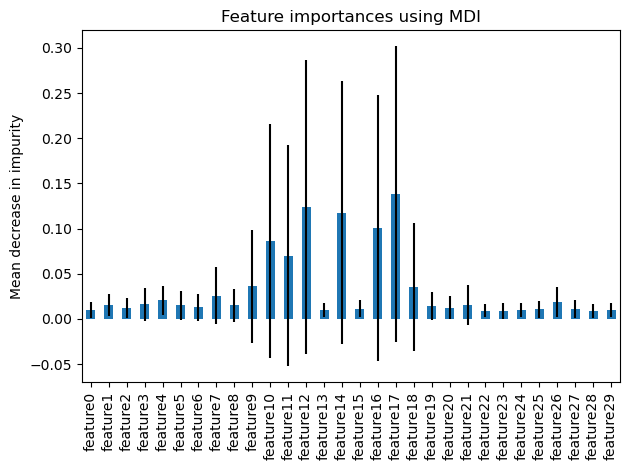

In [361]:
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

Per the figure above, we can see features 10,11, 12,14,16,17 are most important

However, due to the high cardinality of this dataset, it may be misleading to use impurity based feature importance tests. We will have to find other methods to do so

### b) Permutation importance

In [359]:
from sklearn.inspection import permutation_importance
start_time = time.time()
result = permutation_importance(
    forest, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
) #features are shuffled n times and model refitted. so naturally we will have a higher computation time
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

forest_importances = pd.Series(result.importances_mean, index=feature_names)

Elapsed time to compute the importances: 41.642 seconds


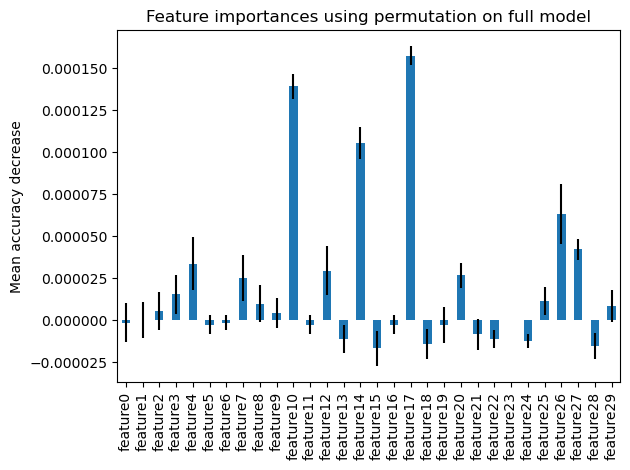

In [298]:
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

We can see here that features 10, 14, and 17 are the most important with the smallest mean accuracy decrease. We can also see that there are certain features that actually increase the mean accuracy, therefore we might want to remove these features from our modeling